# Bayes's Rule and Authorship Attribution

In [1]:
import pandas as pd
import numpy as np

np.random.seed(1)       # fix a seed for reproducible random sampling
# What is the purpose of .seed()?

### 📈 <span style="color: #A084E8">Summary of the dataset</span>
- 107 rows x 11501 columns
- 107 articles 
- 11,500 columns for the word frequency
- 1 column for the target: __AUTHOR__

In [8]:
# load the csv 
df = pd.read_csv("data/federalist-papers.csv", index_col=0)
df.head()

,000,1,10,100,104,105,109,11,114,115,...,young,your,yourself,yourselves,zaleucus,zeal,zealand,zealous,zelden,AUTHOR
1,0,2,0,0,0,0,0,0,0,0,...,0,10,0,0,0,3,0,0,0,HAMILTON
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,JAY
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,JAY
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,JAY
5,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,0,0,0,0,0,JAY


In [13]:
# 5 distinct values in the target column
# `HAMILTON OR MADISON` are the disputed essays 
df["AUTHOR"].value_counts()

AUTHOR
HAMILTON                51
MADISON                 36
HAMILTON OR MADISON     12
JAY                      5
HAMILTON AND MADISON     3
Name: count, dtype: int64

In [11]:
# "function" words that have no strong connection between subject matter addressed by a piece of writing
words_of_interest = ["upon", "the", "state", "enough", "while"]
df[words_of_interest]

,upon,the,state,enough,while
1,6,133,6,1,0
2,1,107,1,0,1
3,0,93,8,0,0
4,0,86,6,0,0
5,0,66,2,0,0
...,...,...,...,...,...
302,0,280,4,0,0
201,1,216,3,1,0
206,4,238,0,0,1
210,0,267,5,0,0


In [12]:
# "Random" sampling from the dataframe
df.sample(6)

,000,1,10,100,104,105,109,11,114,115,...,young,your,yourself,yourselves,zaleucus,zeal,zealand,zealous,zelden,AUTHOR
79,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HAMILTON
212,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MADISON
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MADISON
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MADISON
41,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MADISON
68,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HAMILTON


In [17]:
# filter the essays with unknown authorship
disputed_essays = df[df["AUTHOR"] == "HAMILTON OR MADISON"].index
print("indices of disputed essays:", disputed_essays)

assert len(disputed_essays) == 12
assert set(disputed_essays) == {49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63}

indices of disputed essays: Index([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63], dtype='int64')


In [19]:
# select essays with known authorship: the undisputed essays of Madison and Hamilton
df_known = df.loc[df["AUTHOR"].isin(("HAMILTON", "MADISON"))]
df_known["AUTHOR"].value_counts()

AUTHOR
HAMILTON    51
MADISON     36
Name: count, dtype: int64

AUTHOR
HAMILTON    Axes(0.125,0.11;0.775x0.77)
MADISON     Axes(0.125,0.11;0.775x0.77)
Name: upon, dtype: object

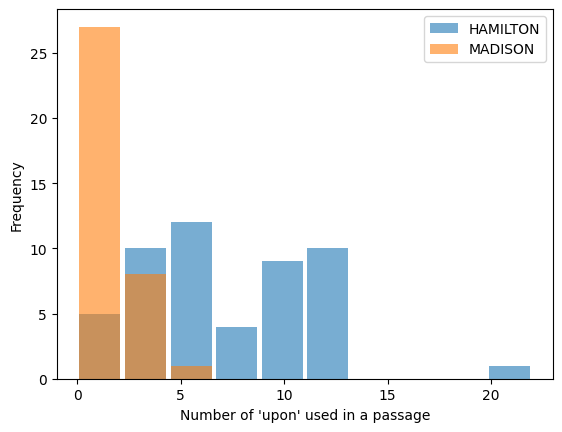

In [25]:
# plot the frequency of "upon" used in the essays with known authorship
df_known.groupby("AUTHOR")["upon"].plot.hist(
    rwidth=0.9, alpha=0.6, range=(0, 22), legend=True, 
    xlabel="Number of 'upon' used in a passage"
)

### 😳 <span style="color: #A084E8">Question</span>

What are the functions of the parameters in `hist()`?

```python
df_known.groupby("AUTHOR")["upon"].plot.hist(
    rwidth=0.9, 
    alpha=0.6, 
    range=(0, 22), 
    legend=True, 
)
```

AUTHOR
HAMILTON    Axes(0.125,0.11;0.775x0.77)
MADISON     Axes(0.125,0.11;0.775x0.77)
Name: upon, dtype: object

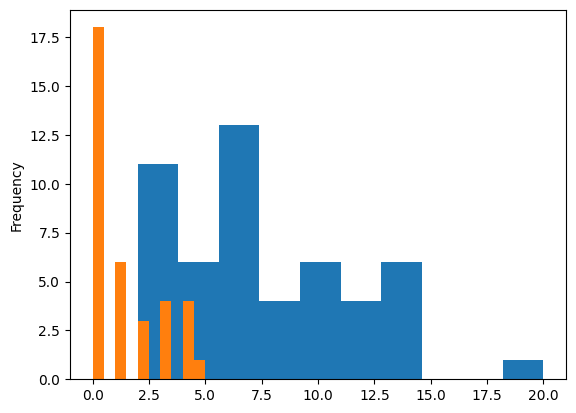

In [21]:
df_known.groupby("AUTHOR")["upon"].plot.hist()

### 😳 <span style="color: #A084E8">Question</span>

What is `groupby()` doing here?

In [40]:
# What is the purpose of groupby()?
df_known.groupby("AUTHOR")
# list(df_known.groupby("AUTHOR"))
# list(df_known.groupby("AUTHOR"))[0][1]

In [26]:
df_known.groupby("AUTHOR")["upon"].describe()

,count,mean,std,min,25%,50%,75%,max
AUTHOR,,,,,,,,
HAMILTON,51.0,7.333333,4.008325,2.0,4.0,6.0,10.00,20.0
MADISON,36.0,1.250000,1.574348,0.0,0.0,0.5,2.25,5.0


In [35]:
proportions = df_known.groupby("AUTHOR")["upon"].apply(
    lambda upon_counts: (upon_counts > 0).mean()
)

print(proportions)

AUTHOR
HAMILTON    1.0
MADISON     0.5
Name: upon, dtype: float64


### 😳 <span style="color: #A084E8">Question</span>

What are the purposes of `lambda` and `mean` here?

In [39]:
def anonymous_function(upon_counts):
    return upon_counts > 0

proportions_with_function = df_known.groupby("AUTHOR")["upon"].apply(anonymous_function).mean()
print(proportions)

AUTHOR
HAMILTON    1.0
MADISON     0.5
Name: upon, dtype: float64


<Axes: xlabel='AUTHOR'>

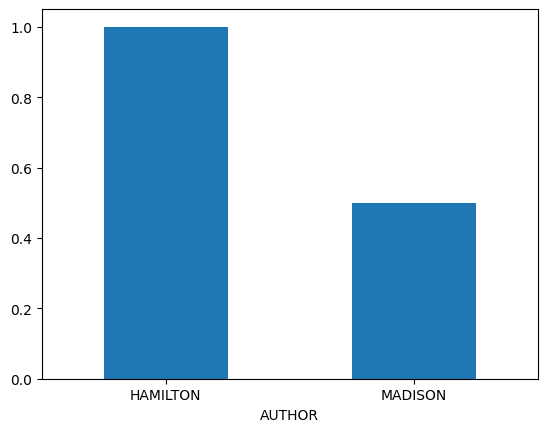

In [47]:
proportions.plot.bar(rot=0)

### 🤔 <span style="color: #A084E8">Possible conclusion</span>
Observing the word `upon` one or more times in a disputed essay is more consistent with the hypothesis that the author is Hamilton than with the hypothesis that Madison is the author.

But what is the preciseness of the conclusion?

Applying Bayes's rule:

$$
Pr(H_{j}|E) = \frac{Pr(E|H_{j})Pr(H_{j})}{\sum^{K}_{k=1}Pr(E|H_{k})Pr(H_{k})}
$$
$$
Pr(H|E) = \frac{Pr(H|E)Pr(H)}{Pr(E|H)Pr(H)+Pr(E|¬H)Pr(¬H)}
$$

# Random variables and probability distributions

In [63]:
df = pd.read_csv("data/federalist-papers.csv", index_col=0)
author = df["AUTHOR"]       # save a copy of the author column
df = df.drop("AUTHOR", axis=1)      # remoe the author column
df = df.divide(df.sum(axis=0))      # rate per 1 word
df *= 1000      # transform from rate per 1 word to rate per 1,000 words
df = df.round()
df["AUTHOR"] = author       # put author column back
df.head()


,000,1,10,100,104,105,109,11,114,115,...,young,your,yourself,yourselves,zaleucus,zeal,zealand,zealous,zelden,AUTHOR
1,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,294.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,HAMILTON
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JAY
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JAY
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JAY
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,333.0,88.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,JAY


In [75]:
df_temp = pd.read_csv("data/federalist-papers.csv", index_col=0)
# temp_author = df_temp["AUTHOR"]

# axis=0 row-wise operation
# axis=1 column-wise operation
# df_temp = df_temp.drop("AUTHOR", axis=1)
# df_temp.sum(axis=0)
# df_temp = df_temp.divide(df_temp.sum(axis=0))
# df_temp *= 1000
# df_temp = df_temp.round()
# df_temp["AUTHOR"] = temp_author
df_temp

,000,1,10,100,104,105,109,11,114,115,...,young,your,yourself,yourselves,zaleucus,zeal,zealand,zealous,zelden,AUTHOR
1,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,294.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,HAMILTON
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JAY
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JAY
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JAY
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,333.0,88.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,JAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,571.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MADISON
201,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MADISON
206,0.0,25.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MADISON
210,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MADISON


In [78]:
df_known = df[df["AUTHOR"].isin({"HAMILTON", "MADISON"})]
df_known.groupby("AUTHOR")["by"].describe()

,count,mean,std,min,25%,50%,75%,max
AUTHOR,,,,,,,,
HAMILTON,51.0,7.019608,4.925404,1.0,5.0,6.0,9.0,34.0
MADISON,36.0,12.916667,4.094421,5.0,10.0,12.5,15.0,23.0


AUTHOR
HAMILTON    Axes(0.125,0.11;0.775x0.77)
MADISON     Axes(0.125,0.11;0.775x0.77)
Name: by, dtype: object

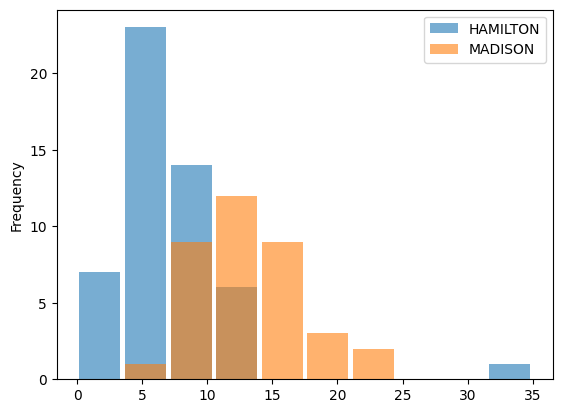

In [79]:
df_known.groupby('AUTHOR')['by'].plot.hist(
    alpha=0.6, range=(0, 35), rwidth=0.9, legend=True)

In [80]:
print(df_known.loc[df_known["by"] > 30, "by"])

83    34.0
Name: by, dtype: float64


In [82]:
with open("data/federalist-83.txt") as infile:
    text = infile.read()

by_jury_count = text.count(" by jury")
by_count = text.count(" by ")
word_count = len(text.split())
by_rate = 1000 * (by_count - by_jury_count) / word_count

print(f"In Federalist No. 83 (by Hamilton), without 'by jury', 'by' occurs {by_rate:.0f} times per 1,000 words on average.")

In Federalist No. 83 (by Hamilton), without 'by jury', 'by' occurs 7 times per 1,000 words on average.


In [83]:
import scipy.special


def negbinom_pmf(x, alpha, beta):
    """Negative binomial probability mass function"""
    return (scipy.special.binom(x + alpha - 1, alpha - 1) * (beta / (beta + 1)) ** alpha * (1 / (beta + 1)) ** x)

print("Pr(X = 6): ", negbinom_pmf(6, alpha=5, beta=1))
print("Pr(X = 14): ", negbinom_pmf(14, alpha=5, beta=1))


Pr(X = 6):  0.1025390625
Pr(X = 14):  0.00583648681640625


<Axes: ylabel='Frequency'>

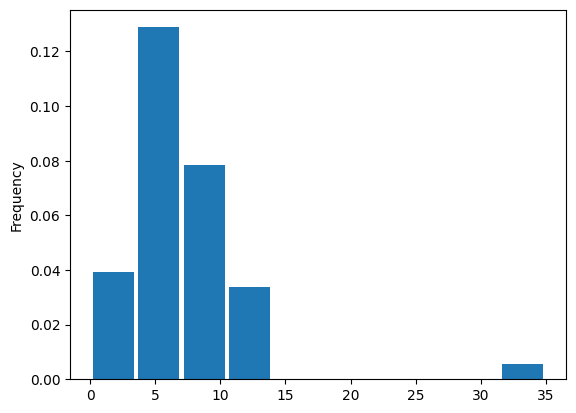

In [86]:
df_known[df_known["AUTHOR"] == "HAMILTON"]["by"].plot.hist(range=(0, 35), density=True, rwidth=0.9)

In [87]:
df_known[df_known["AUTHOR"] == "HAMILTON"]["by"].describe()

count    51.000000
mean      7.019608
std       4.925404
min       1.000000
25%       5.000000
50%       6.000000
75%       9.000000
max      34.000000
Name: by, dtype: float64

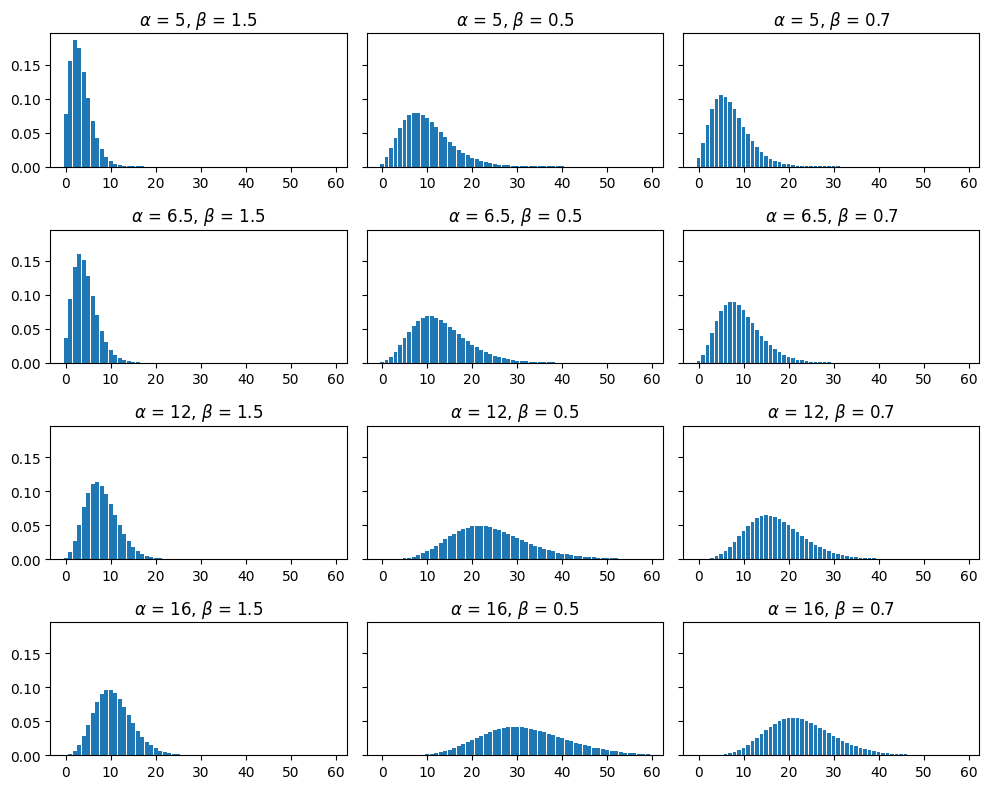

In [93]:
import itertools
import matplotlib.pyplot as plt


x = np.arange(60)
alphas, betas = [5, 6.5, 12, 16], [1.5, 0.5, 0.7]
params = list(itertools.product(alphas, betas))
# print(params)
pmfs = [negbinom_pmf(x, alpha, beta) for alpha, beta in params]

fig, axes = plt.subplots(4, 3, sharey=True, figsize=(10, 8))
axes = axes.flatten()

for ax, pmf, (alpha, beta) in zip(axes, pmfs, params):
    ax.bar(x, pmf)
    ax.set_title(fr"$\alpha$ = {alpha}, $\beta$ = {beta}")

plt.tight_layout()

In [94]:
def negbinom(alpha, beta, size=None):
    n = alpha
    p = beta / (beta + 1)
    return np.random.negative_binomial(n, p, size)


samples = negbinom(5, 0.7, 10_000)
pd.Series(samples).describe()

count    10000.000000
mean         7.077100
std          4.119837
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         29.000000
dtype: float64

<Axes: ylabel='Frequency'>

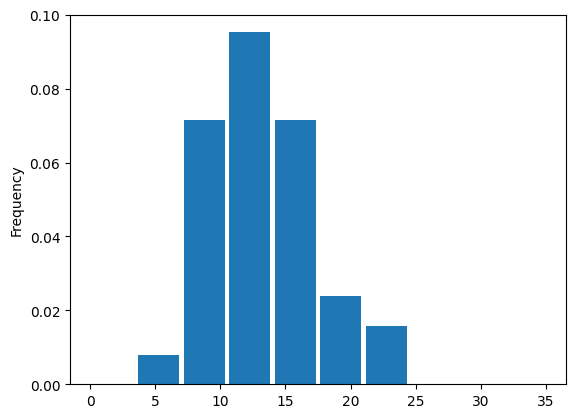

In [95]:
df_known[df_known["AUTHOR"] == "MADISON"]["by"].plot.hist(
    density=True,
    rwidth=0.9,
    range=(0, 35)
)

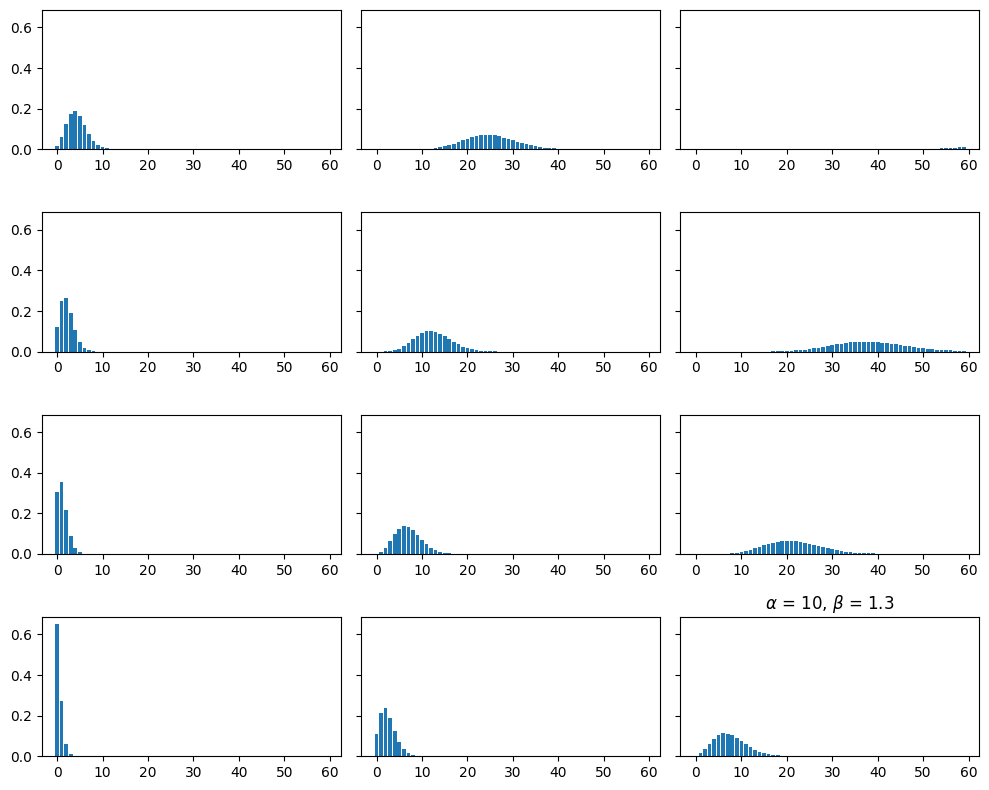

In [96]:
x = np.arange(60)
alphas, betas = [100, 50, 28, 10], [23, 4, 1.3]
params = list(itertools.product(alphas, betas))
pmfs = [negbinom_pmf(x, alpha, beta) for alpha, beta in params]
fig, axes = plt.subplots(4, 3, sharey=True, figsize=(10, 8))
axes = axes.flatten()
for ax, pmf, (alpha, beta) in zip(axes, pmfs, params): ax.bar(x, pmf)
ax.set_title(fr"$\alpha$ = {alpha}, $\beta$ = {beta}") 
plt.tight_layout()

In [97]:
authors = ("HAMILTON", "MADISON")
alpha_hamilton, beta_hamilton = 5, 0.7
alpha_madison, beta_madison = 50, 4

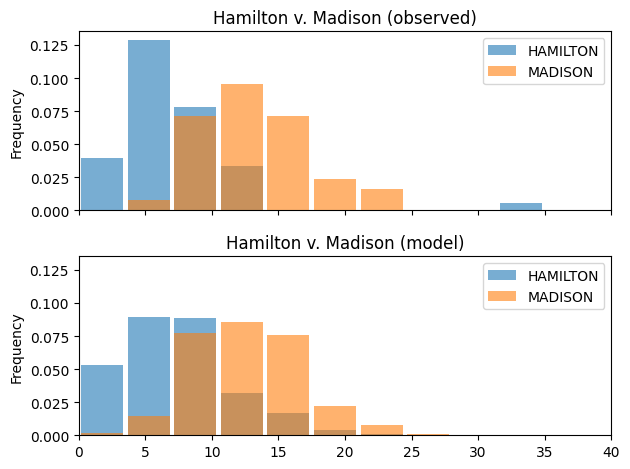

In [100]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
df_known.groupby('AUTHOR')['by'].plot.hist(
    ax=axes[0],
    density=True,
    range=(0, 35),
    rwidth=0.9,
    alpha=0.6,
    title="Hamilton v. Madison (observed)",
    legend=True)

simulations = 10000
for author, (alpha, beta) in zip(authors, [(alpha_hamilton, beta_hamilton), (alpha_madison, beta_madison)]):
    pd.Series(negbinom(alpha, beta, size=simulations)).plot.hist(
        label=author,
        density=True,
        rwidth=0.9,
        alpha=0.6,
        range=(0, 35),
        ax=axes[1])
axes[1].set_xlim((0, 40))
axes[1].set_title("Hamilton v. Madison (model)")
axes[1].legend()
plt.tight_layout()

In [101]:
likelihood_hamilton = negbinom_pmf(14, alpha_hamilton, beta_hamilton) 
print(likelihood_hamilton)

0.021512065936254765


In [102]:
likelihood_madison = negbinom_pmf(14, alpha_madison, beta_madison)
print(likelihood_madison)

0.08742647980678281


In [103]:
pr_hamilton = likelihood_hamilton * 0.5 / (
    likelihood_hamilton * 0.5 + likelihood_madison * 0.5)
print(pr_hamilton)

0.19746973662561154
